In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml(name='mnist_784', version=1, return_X_y=True)

In [9]:
# saving data to be used in the project
features, target = data
target = target.astype(np.int) # convert target from string to integer
data_df = pd.DataFrame(np.column_stack((features,target)), columns=[f"f_{i}" for i in range(features.shape[1])] + ['target'])
data_df.to_csv("../input/training.csv")

In [9]:
type(data)

tuple

In [10]:
data[0].shape, data[1].shape

((70000, 784), (70000,))

In [16]:
pixel_values, targets = data
targets = targets.astype(np.int)

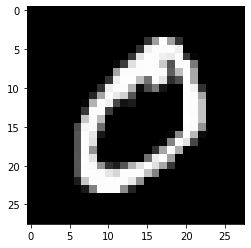

In [18]:
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap='gray')

## T-SNE transformation of data

In [24]:
tsne = manifold.TSNE(n_components=2, random_state=100)
transformed_data = tsne.fit_transform(pixel_values[:3000])

In [25]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])), columns=["x", "y", "targets"])

In [28]:
tsne_df.head()

,x,y,targets
0,-15.232313,-26.184914,5.0
1,15.100454,-61.300503,0.0
2,-59.321838,15.832885,4.0
3,22.315487,45.132023,1.0
4,-34.225151,18.052425,9.0


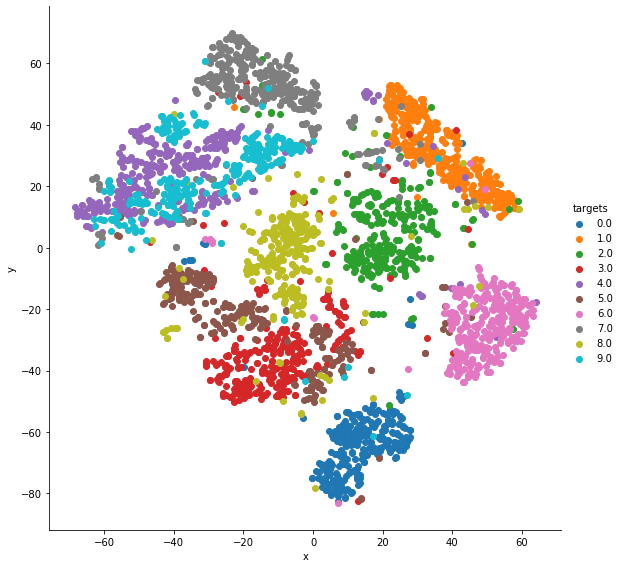

In [32]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

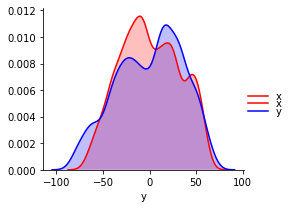

In [36]:
grid = sns.FacetGrid(tsne_df)
grid.map(sns.kdeplot, "x", shade='True', color='r').add_legend()
grid.map(sns.kdeplot, "y", shade='True', color='b').add_legend()